### 親水性ポケット or 疎水性ポケットを持つタンパクを取得

In [1]:
import sys
sys.path.append('../..')

In [2]:
import os
import numpy as np
from lib.path import get_training_data_dir
from data_loader.SingleDataLoader import SingleDataLoader

2024-07-13 13:39:57.360380: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-07-13 13:39:57.362962: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-13 13:39:57.395676: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-13 13:39:57.395699: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-13 13:39:57.396888: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to

In [14]:
data_dir = '../../../data'
phobic_pdb_list_path = os.path.join(data_dir, 'train_ave_SASA_large_pdb')
philic_pdb_list_path = os.path.join(data_dir, 'train_ave_SASA_small_pdb')

In [15]:
with open(phobic_pdb_list_path, 'r') as f:
    phobic_pdb_list = f.read().splitlines()
with open(philic_pdb_list_path, 'r') as f:
    philic_pdb_list = f.read().splitlines()

In [16]:
print(len(phobic_pdb_list), len(philic_pdb_list))

941 1369


### それぞれのタンパクのトレーニングデータを取得し、合計値を配列に格納

In [23]:
DATA_TYPE1 = 'gr'
DATA_VOXEL_NUM = 10
CLASSIFYING_RULE = 'WaterClassifyingRuleSurface'
LIGAND_POCKET_DEFINER = 'LigandPocketDefinerOriginal'
LIGAND_VOXEL_NUM = 8
training_data_dir = get_training_data_dir(DATA_TYPE1, DATA_VOXEL_NUM, CLASSIFYING_RULE, LIGAND_POCKET_DEFINER, LIGAND_VOXEL_NUM)

In [24]:
data_loader = SingleDataLoader(training_data_dir)
phobic_data, phobic_label = data_loader.load_data(phobic_pdb_list_path)
philic_data, philic_label = data_loader.load_data(philic_pdb_list_path)

Error processing 4oiv: No data found for 4oiv
Error processing 4ieh: No data found for 4ieh
Error processing 4poh: No data found for 4poh
Error processing 3fur: No data found for 3fur
Error processing 5ehr: No data found for 5ehr
Error processing 4pp3: No data found for 4pp3
Error processing 5eqy: No data found for 5eqy
Error processing 4pp5: No data found for 4pp5
Error processing 1y1z: No data found for 1y1z
Error processing 5afv: No data found for 5afv
Error processing 3ebo: No data found for 3ebo
Error processing 4poj: No data found for 4poj
Error processing 2yxj: No data found for 2yxj
Error processing 4r06: No data found for 4r06
Error processing 3ebp: No data found for 3ebp
Error processing 3qkd: No data found for 3qkd
Error processing 4k6i: No data found for 4k6i
Error processing 5ime: No data found for 5ime
Error processing 4da5: No data found for 4da5
Error processing 3zi0: No data found for 3zi0
Error processing 4m8e: No data found for 4m8e
Error processing 4abg: No data fou

In [25]:
phobic_label

array([1., 0., 1., ..., 0., 0., 1.])

In [26]:
replace_sum_phobic = []
non_replace_sum_phobic = []
phobic_data_array = np.array(phobic_data)
for data, label in zip(phobic_data_array, phobic_label):
    if label == 0:
        non_replace_sum_phobic.append(data.sum())
    else:
        replace_sum_phobic.append(data.sum())

replace_sum_philic = []
non_replace_sum_philic = []
philic_data_array = np.array(philic_data)
for data, label in zip(philic_data_array, philic_label):
    if label == 0:
        non_replace_sum_philic.append(data.sum())
    else:
        replace_sum_philic.append(data.sum())

### plotする

In [27]:
import matplotlib.pyplot as plt

def plot_histogram(array1, array2, bins=100, title1='', title2=''):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))  # 1行2列のサブプロットを作成

    # array1のヒストグラムをプロット
    ax1.hist(array1, bins=bins, alpha=0.7, color='blue', label='Array 1')
    ax1.set_title(title1)
    ax1.set_xlabel('sum of gr')
    ax1.set_ylabel('Frequency')

    # array2のヒストグラムをプロット
    ax2.hist(array2, bins=bins, alpha=0.7, color='red', label='Array 2')
    ax2.set_title(title2)
    ax2.set_xlabel('sum of gr')
    ax2.set_ylabel('Frequency')

    plt.tight_layout()  # レイアウトを自動調整
    plt.show()  # グラフを表示

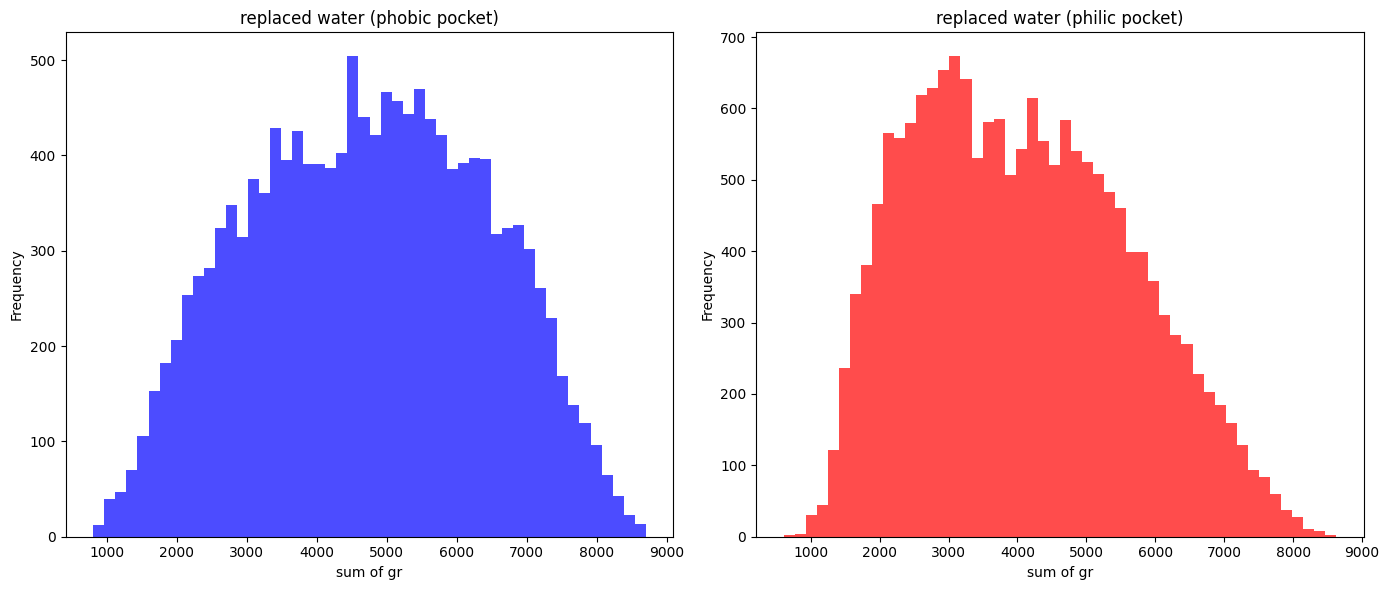

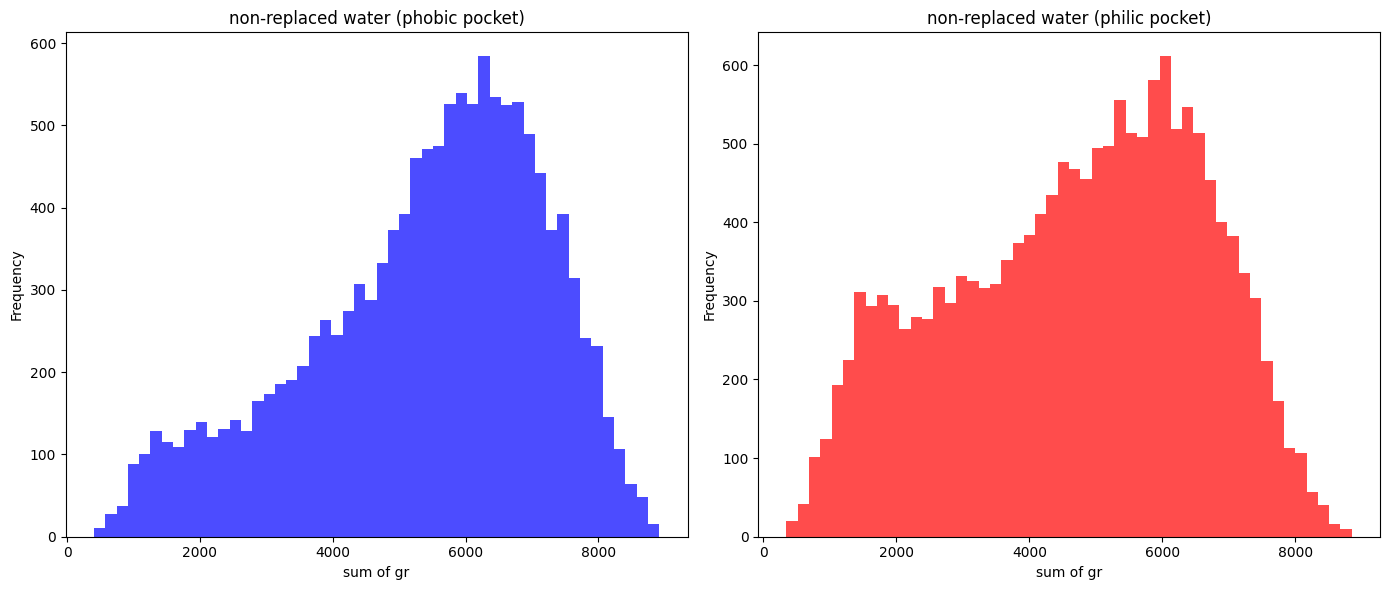

In [28]:
plot_histogram(replace_sum_phobic, replace_sum_philic, 50, 'replaced water (phobic pocket)', 'replaced water (philic pocket)')
plot_histogram(non_replace_sum_phobic, non_replace_sum_philic, 50, 'non-replaced water (phobic pocket)', 'non-replaced water (philic pocket)')

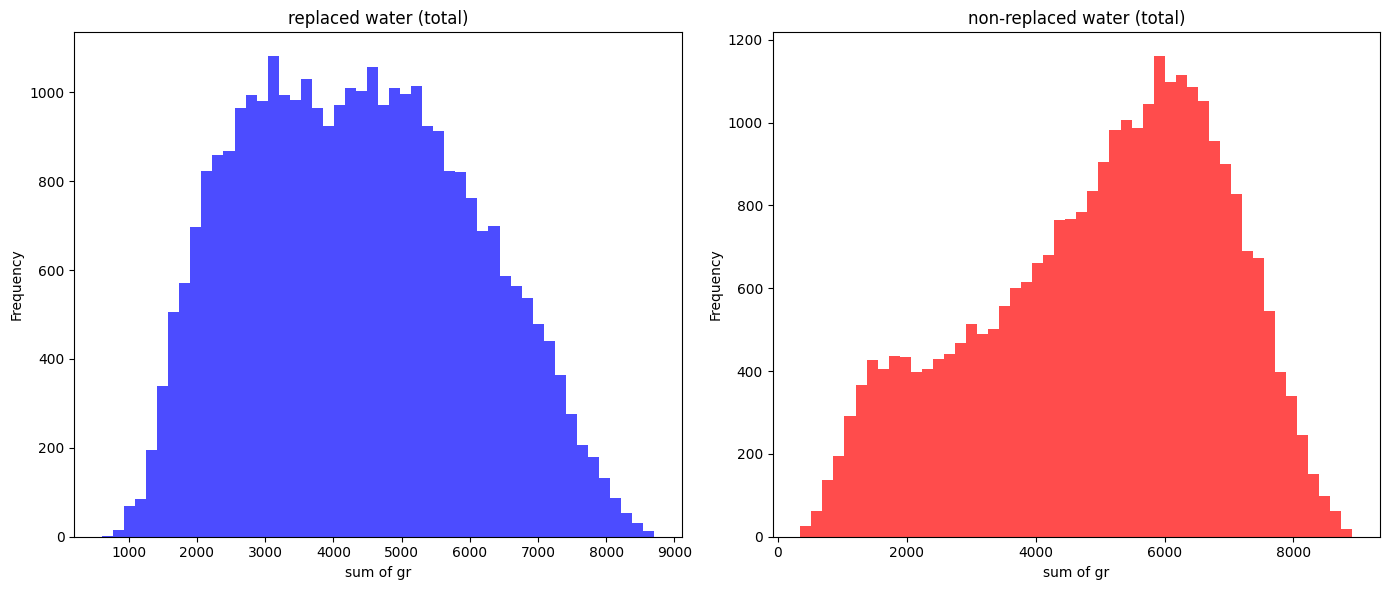

In [29]:
plot_histogram(replace_sum_phobic + replace_sum_philic, non_replace_sum_phobic + non_replace_sum_philic, 50, 'replaced water (total)', 'non-replaced water (total)')

In [3]:
from lib.pdb import get_all_pdb_names

In [4]:
pdb_names = get_all_pdb_names()

In [5]:
with open('../../../data/all_protein', 'w') as f:
    for pdb_name in pdb_names:
        f.write(pdb_name + '\n')